# Delhi Metro Network Analysis

Metro Network Analysis involves the application of data science techniques to understand and interpret the characteristics and dynamics of metro systems.

The provided dataset contains detailed information about the Delhi Metro network, one of the largest and busiest urban transit systems in the world. Key features of the dataset include:

 - Station Information: Names and IDs of metro stations.
 - Geographical Coordinates: Latitude and longitude of each station.
 - Line Information: The specific metro line each station belongs to.
 - Distance Data: The distance of each station from the start of its line.
 - Station Layout: Type of station layout (e.g., Elevated, Underground, At-Grade).
 - Opening Date: Date of inauguration of each station.
 
You can download the data [here](https://statso.io/metro-network-analysis-case-study/).

If you have any question or suggestion about the following analysis, please feel free to send them at this [e-mail](ivankirtis5@gmail.com).

In [1]:
# Importing the packages
import pandas as pd
import folium
from geopy.distance import geodesic as gd
import matplotlib.pyplot as plt

## Data Cleaning

In [2]:
# Loading the data
Delhi_Metro_Network = "C:/Users/hngb2/Dropbox/Data Science Projects/Delhi-Metro-Network/Delhi-Metro-Network.csv"
data = pd.read_csv(Delhi_Metro_Network)

# Display the first 10 rows of the DataFrame
data.head(10)

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260
5,6,Dilli Haat INA [Conn: Yellow],24.9,Pink line,2018-06-08,Underground,28.574408,77.210241
6,7,Noida Sector 143,11.5,Aqua line,2019-01-25,Elevated,28.502663,77.426256
7,8,Moolchand,15.1,Voilet line,2010-03-10,Elevated,28.564170,77.234230
8,9,Chawri Bazar,15.3,Yellow line,2005-03-07,Underground,28.649310,77.226370
9,10,Maya Puri,12.8,Pink line,2018-03-14,Elevated,28.637179,77.129733


In [3]:
# Let's start checking and cleaning the data

# Summary statistics
desc = data.describe()

# Check for missing values
missing = data.isnull().sum()

# Ckeck the data types of each column
d_type = data.dtypes

In [4]:
desc

,Station ID,Distance from Start (km),Latitude,Longitude
count,285.000000,285.000000,285.000000,285.000000
mean,143.000000,19.218947,28.595428,77.029315
std,82.416625,14.002862,0.091316,2.875400
min,1.000000,0.000000,27.920862,28.698807
25%,72.000000,7.300000,28.545828,77.107130
50%,143.000000,17.400000,28.613453,77.207220
75%,214.000000,28.800000,28.666360,77.281165
max,285.000000,52.700000,28.878965,77.554479


In [5]:
missing

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [6]:
d_type

Station ID                    int64
Station Name                 object
Distance from Start (km)    float64
Line                         object
Opening Date                 object
Station Layout               object
Latitude                    float64
Longitude                   float64
dtype: object

In [7]:
# Let's convert the "Opening Date" variable into the correct datetime format
data['Opening Date'] = pd.to_datetime(data['Opening Date'])

# Check the updated variable type
print(data.dtypes)

Station ID                           int64
Station Name                        object
Distance from Start (km)           float64
Line                                object
Opening Date                datetime64[ns]
Station Layout                      object
Latitude                           float64
Longitude                          float64
dtype: object


In [8]:
# Let's check for duplicate rows
duplicate = data[data.duplicated()]

print(duplicate)

Empty DataFrame
Columns: [Station ID, Station Name, Distance from Start (km), Line, Opening Date, Station Layout, Latitude, Longitude]
Index: []


The data have been imported and inspected and we can see that there is no flagrant issues with them, unless the dates which were not in date type format such that we had to convert them into the correct one. There also are no duplicate case in the dataframe. We can then proceed to the analysis.

## Geospatial Analysis

This type of analysis will help us understand how the  metro lines are distributed all over the city. We will also look at some characteristics of the metro stations and their layouts such as the average distance of the lines layouts to the city center.

In [9]:
# First, we create a map centered at Delhi's coordinates
delhi_map = folium.Map(location=[28.7041, 77.1025], zoom_start=11)

# Next is to define a dictionary mapping line names to colors
line_colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'yellow',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cyan',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}

# Then we add the markers for each station with the folium marker method
for i, station in data.iterrows():
    line_color = line_colors.get(station['Line'], 'cadetblack')  # This put cadetblack by default if no line color is specified
    folium.Marker(
        location=[station['Latitude'], station['Longitude']],
        popup=station['Station Name'],
        icon=folium.Icon(color=line_color)
    ).add_to(delhi_map)

# Display the map
delhi_map

C:\Users\hngb2\AppData\Local\Temp\ipykernel_6380\1149050903.py:27: UserWarning: color argument of Icon should be one of: {'gray', 'darkpurple', 'purple', 'lightred', 'darkred', 'orange', 'darkgreen', 'cadetblue', 'white', 'darkblue', 'green', 'lightblue', 'black', 'beige', 'lightgreen', 'lightgray', 'red', 'pink', 'blue'}.
  icon=folium.Icon(color=line_color)


We can easily distinguish each station marker and it's line and get information about their name and exact exact location without having to check the data. It is also easy to see and guess which ones of the lines are having more stations than others. We will now go deeper looking at the geographical characteristics of the metro stations layouts within the Delhi city.

In [10]:
# Coordinates of the center of Delhi city (latitude, longitude)
delhi_center = (28.7041, 77.1025)

# Function to calculate the distance between two geographical points
def distance_to_delhi_center(lat, lon):
    station_coords = (lat, lon)
    return gd(delhi_center, station_coords).kilometers

# Applying the function to calculate the distance of each station to the center of Delhi city
data['Distance to Delhi Center (km)'] = data.apply(lambda row: distance_to_delhi_center(row['Latitude'],
                                                                                        row['Longitude']), axis=1)

# Group the data by 'Line' and 'Station Layout', then calculate the mean distance to the city center for each group
avg_distance_to_delhi_center = data.groupby(['Line', 'Station Layout'])['Distance to Delhi Center (km)'].mean()

# Reset the index to make it easier to work with that grouped data
avg_distance_to_delhi_center = avg_distance_to_delhi_center.reset_index()

# Group the previous data again by 'Line' and calculate the overall average distance to the city center for each line
avg_distance_to_delhi_center_by_line = avg_distance_to_delhi_center.groupby('Line')['Distance to Delhi Center (km)'].mean()

# Print the average distance to the city center for each line
print("Average Distance of Layouts to Delhi Center for Each Line:")
print(avg_distance_to_delhi_center_by_line)

Average Distance of Layouts to Delhi Center for Each Line:
Line
Aqua line             39.664417
Blue line             16.455142
Blue line branch      19.793196
Gray line             14.854646
Green line             7.636972
Green line branch      6.678435
Magenta line          20.326744
Orange line           14.667425
Pink line             15.144320
Rapid Metro           23.346144
Red line             175.291694
Voilet line           26.012866
Yellow line           16.281874
Name: Distance to Delhi Center (km), dtype: float64


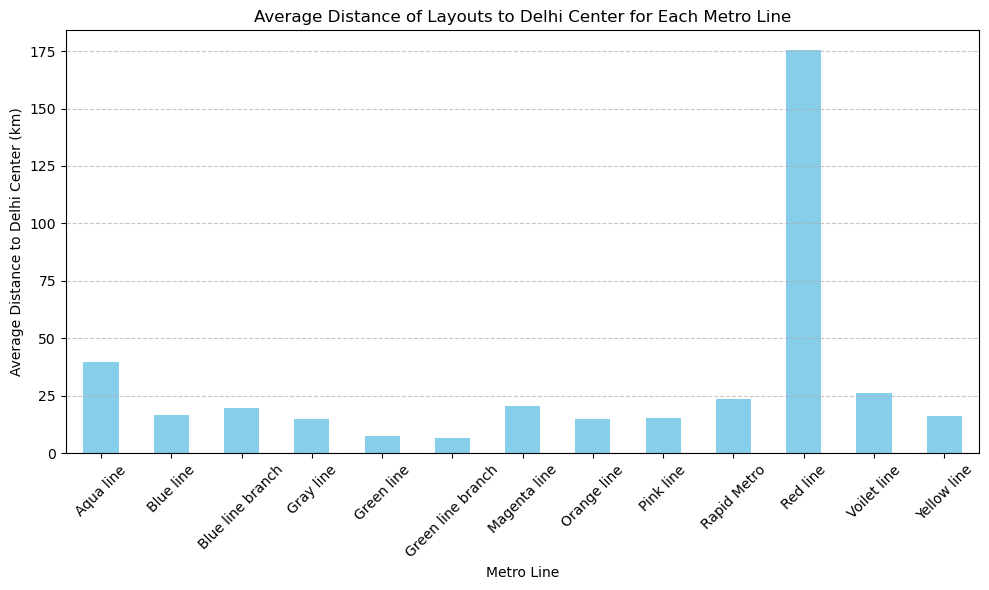

In [11]:
# Plot the average distance to the city center for each line
plt.figure(figsize=(10, 6))
avg_distance_to_delhi_center_by_line.plot(kind='bar', color='skyblue')
plt.title('Average Distance of Layouts to Delhi Center for Each Metro Line')
plt.xlabel('Metro Line')
plt.ylabel('Average Distance to Delhi Center (km)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The red line stations layouts clearly appeas to be the further away from the city center with an average of 175 kilometers of distance.

In [12]:
# Calculate summary statistics for distance from city center for each station layout
summary_stats = data.groupby('Station Layout')['Distance to Delhi Center (km)'].agg(['mean', 'median', 'std'])

# Print the summary statistics
print("Summary Statistics for Distance from City Center by Station Layout:")
print(summary_stats)

Summary Statistics for Distance from City Center by Station Layout:
                     mean     median         std
Station Layout                                  
At-Grade        14.698060  18.483781    6.557061
Elevated        41.232576  19.695175  319.858922
Underground     16.938534  15.691094   10.593619


The summary statistics gives us some more information about the stations layout types and how far are these layouts stations from the Delhi center. The stations with elevated layouts are far away than the at-grade and the underground stations. This can be explained by the high number of stations with elevated layout due to their cost-effectiveness and less challenging construction.

## Line Analysis & Visualization

Let's now look at the distribution of the stations in the network regarding the metro lines. 

In [13]:
# Let's count the stations for each line
station_count = data['Line'].value_counts()

# Computing the average distances between stations per line
total_dist_by_line = data.groupby('Line')['Distance from Start (km)'].max()
avg_dist_by_line = total_dist_by_line / (station_count - 1)

# Combine the two variables into a pandas DataFrame
line_df = pd.concat([station_count, avg_dist_by_line], axis=1)
line_df.columns = ['Number of Stations', 'Average Distance between Stations (km)']

# Print the combined DataFrame
print("Line Analysis:")
print(line_df)

Line Analysis:
                   Number of Stations  Average Distance between Stations (km)
Blue line                          49                                1.097917
Pink line                          38                                1.421622
Yellow line                        37                                1.269444
Voilet line                        34                                1.318182
Red line                           29                                1.167857
Magenta line                       25                                1.379167
Aqua line                          21                                1.355000
Green line                         21                                1.240000
Rapid Metro                        11                                1.000000
Blue line branch                    8                                1.157143
Orange line                         6                                4.160000
Gray line                           3            

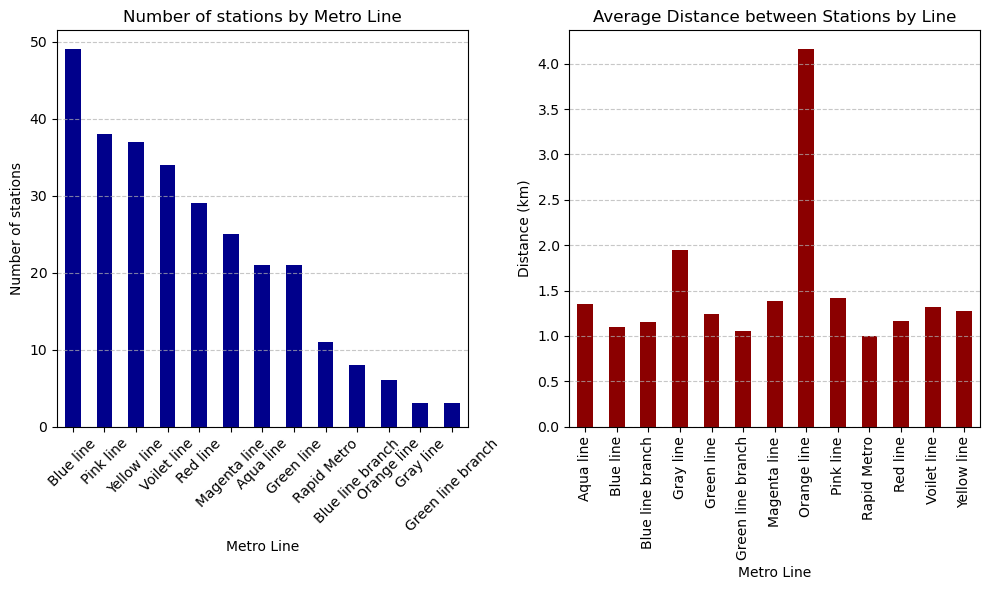

In [14]:
# Let's plot and visualize the previous metrics
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Plottig the number of stations by line
station_count.plot(kind='bar', ax=ax1, color='darkblue')
ax1.set_title('Number of stations by Metro Line')
ax1.set_xlabel('Metro Line')
ax1.set_ylabel('Number of stations')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plotting the average distance between stations along metro lines
avg_dist_by_line.plot(kind='bar', ax=ax2, color='darkred')
ax2.set_title('Average Distance between Stations by Line')
ax2.set_xlabel('Metro Line')
ax2.set_ylabel('Distance (km)')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The Blue line is the metro line having the greater number of stations in Delhi while the Orange line have the most distanced stations across the line.

## Layouts Analysis

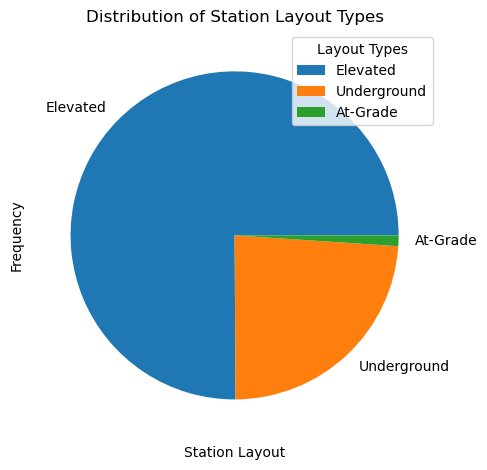

In [15]:
# Count the occurrences of each station layout type
layout_counts = data['Station Layout'].value_counts()

# Plot the distribution of station layout types
layout_counts.plot(kind='pie')
plt.title('Distribution of Station Layout Types')
plt.xlabel('Station Layout')
plt.ylabel('Frequency')
plt.legend(layout_counts.index ,title = 'Layout Types', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
# Let's look at the distribution of station's layouts types by line
layout_counts_by_line = data.groupby(['Line', 'Station Layout']).size().unstack(fill_value=0)

# Display the count of station layout types for each metro line
print("Number of Layout Type by Line:")
print(layout_counts_by_line)

Number of Layout Type by Line:
Station Layout     At-Grade  Elevated  Underground
Line                                              
Aqua line                 0        21            0
Blue line                 1        44            4
Blue line branch          1         7            0
Gray line                 0         2            1
Green line                0        21            0
Green line branch         1         2            0
Magenta line              0        10           15
Orange line               0         1            5
Pink line                 0        26           12
Rapid Metro               0        11            0
Red line                  0        29            0
Voilet line               0        23           11
Yellow line               0        17           20


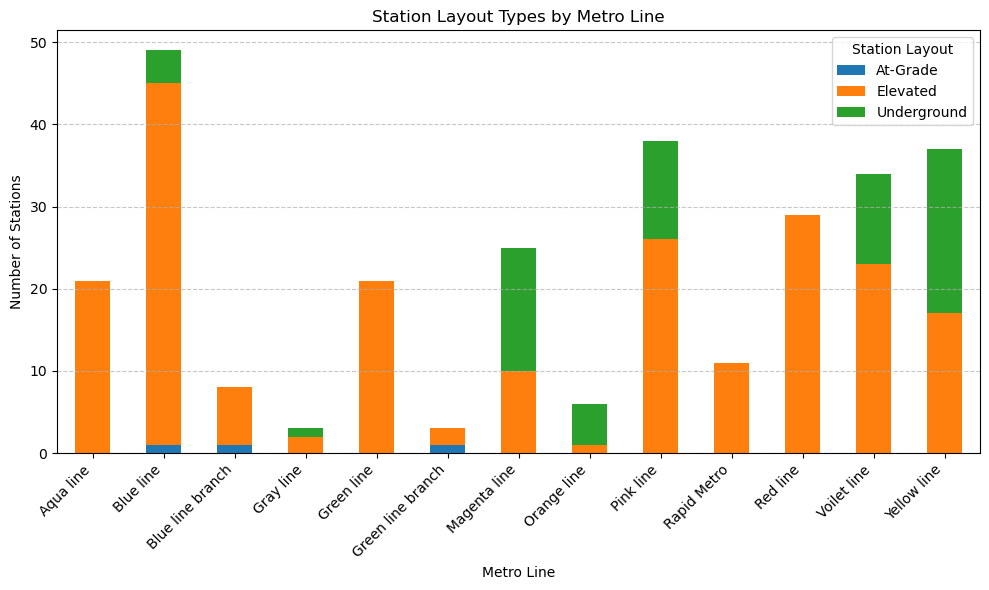

In [17]:
# Plotting the distribution of station's layout types for each metro line
layout_counts_by_line.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Station Layout Types by Metro Line')
plt.xlabel('Metro Line')
plt.ylabel('Number of Stations')
plt.legend(title='Station Layout')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Most of the stations are built with elevated layouts.

## Temporal Analysis

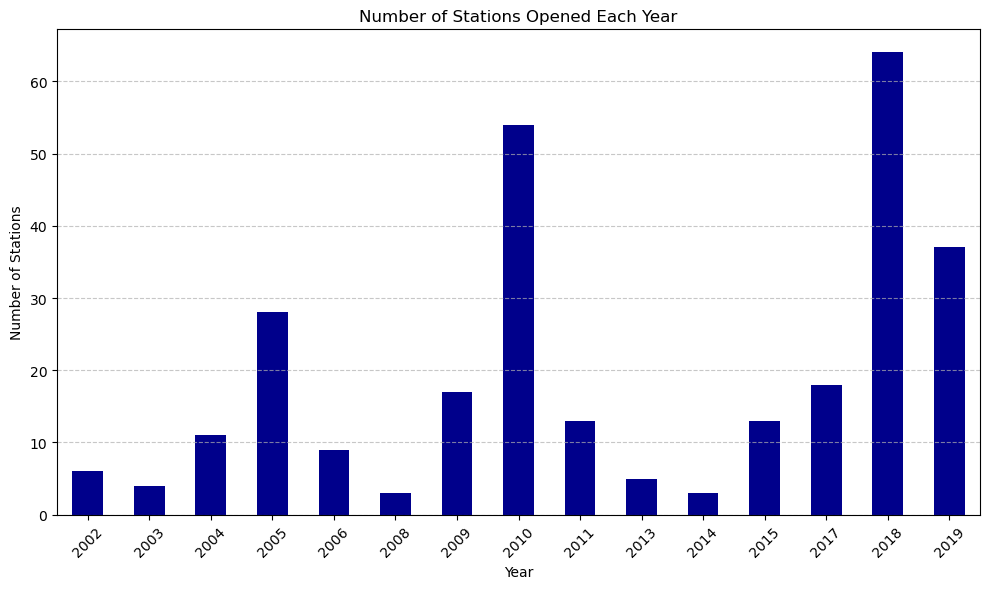

In [18]:
# Let's first extract the years from 'Opening Date'
data['Year'] = data['Opening Date'].dt.year

# Counting the number of stations opened each year
stations_opened_per_year = data['Year'].value_counts().sort_index()

# Plotting the number of stations opened each year
plt.figure(figsize=(10, 6))
stations_opened_per_year.plot(kind='bar', color='darkblue',
                              title = 'Number of Stations Opened Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

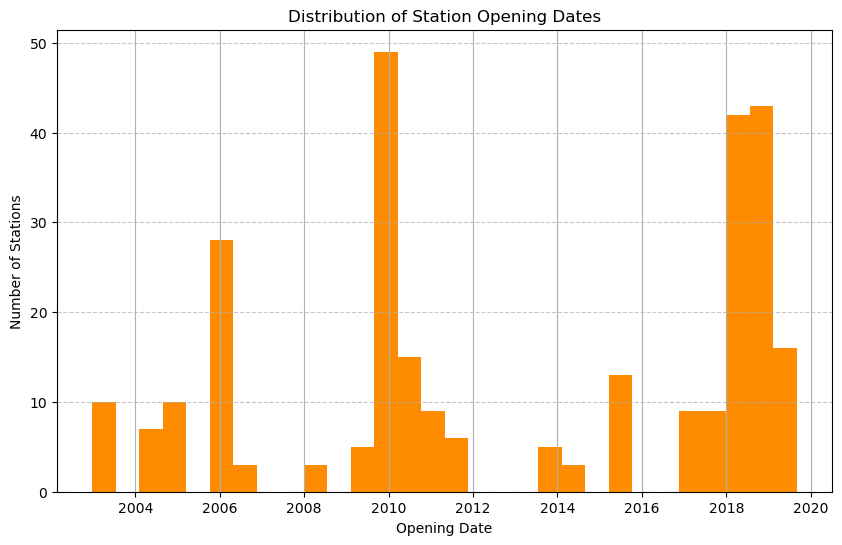

In [19]:
# Looking at the distribution of station opening dates
plt.figure(figsize=(10, 6))
data['Opening Date'].hist(bins=30, color='darkorange')
plt.title('Distribution of Station Opening Dates')
plt.xlabel('Opening Date')
plt.ylabel('Number of Stations')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

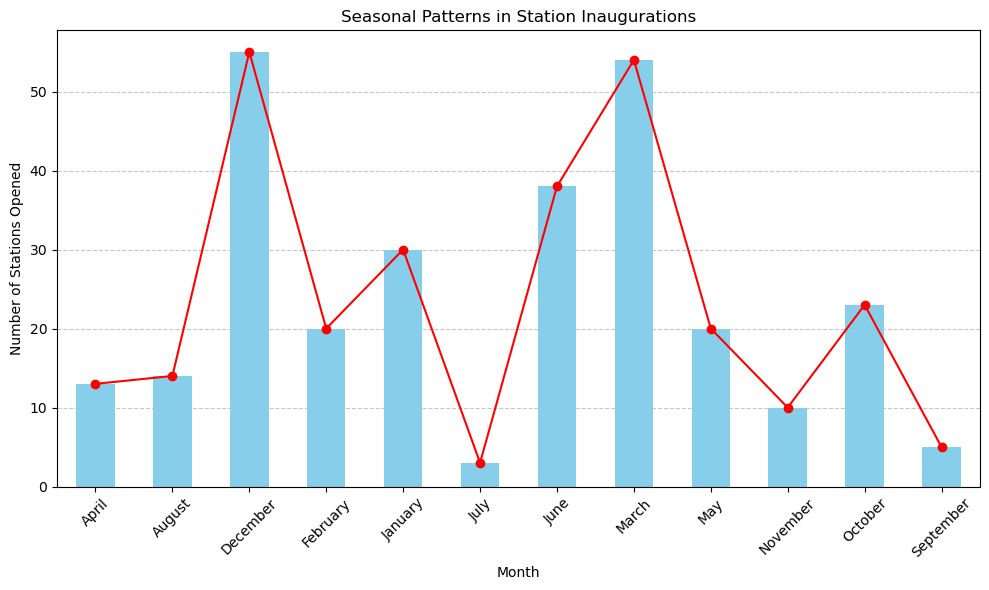

In [20]:
# Let's analyze seasonal patterns in station inaugurations
# Convert 'Opening Date' column to datetime format
data['Opening Date'] = pd.to_datetime(data['Opening Date'])

# Extract month from 'Opening Date'
data['Month'] = data['Opening Date'].dt.month_name()

# Count the number of stations opened each month
stations_opened_per_month = data['Month'].value_counts().sort_index()

# Plotting seasonal patterns in station inaugurations with line connecting tops of bars
plt.figure(figsize=(10, 6))

# Plotting the bar plot
stations_opened_per_month.plot(kind='bar', color='skyblue', zorder=2)

# Plotting the line connecting tops of bars
plt.plot(stations_opened_per_month.index, stations_opened_per_month.values, marker='o', color='red', linestyle='-', zorder=3)

plt.title('Seasonal Patterns in Station Inaugurations')
plt.xlabel('Month')
plt.ylabel('Number of Stations Opened')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Most of stations were opened in the years 2010, 2018 and 2019 with high number of inaugurations in December, January, June, March and October.